[LightGBM] [Info] Number of positive: 338, number of negative: 362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482857 -> initscore=-0.068598
[LightGBM] [Info] Start training from score -0.068598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

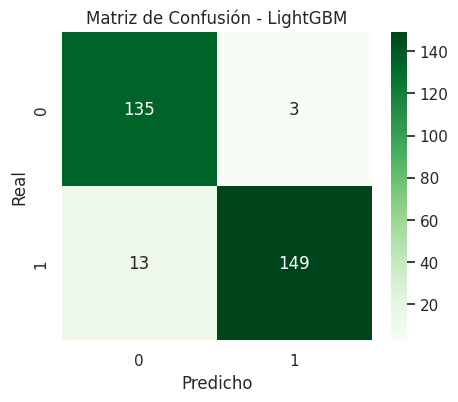

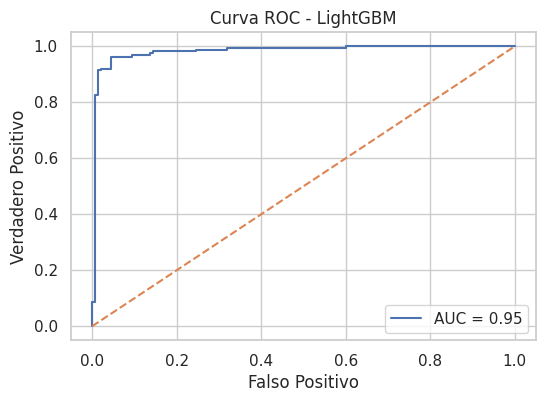

[LightGBM] [Info] Number of positive: 271, number of negative: 289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1870
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483929 -> initscore=-0.064308
[LightGBM] [Info] Start training from score -0.064308
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 271, number of negative: 289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1871
[LightGBM] [Info] Number

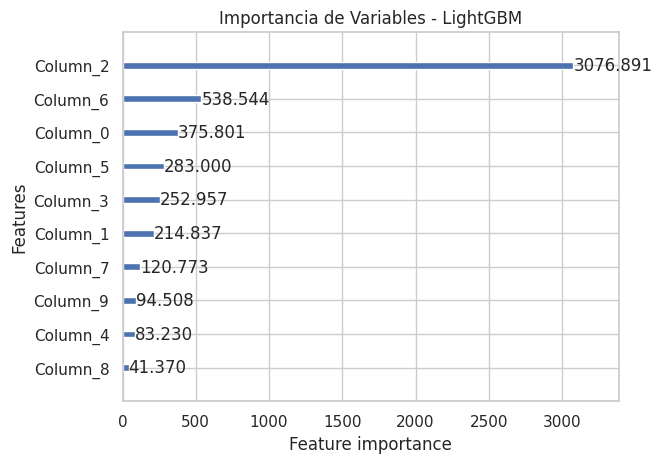

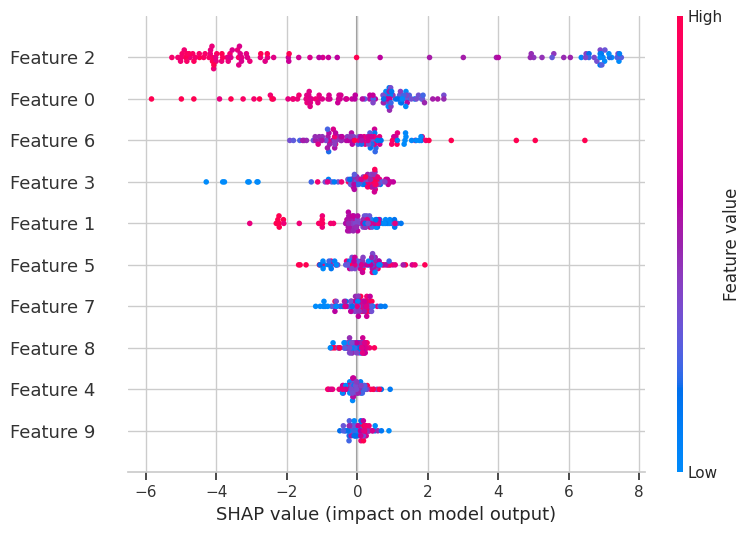

In [21]:
# LightGBM - Proyecto Profesional con Datos Sintéticos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

import lightgbm as lgb
import shap
import warnings
warnings.filterwarnings("ignore")

# 1. Generar datos sintéticos
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6,
                           n_redundant=2, n_clusters_per_class=1, random_state=42)

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Crear modelo LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 4. Evaluar modelo
y_pred = lgb_model.predict(X_test)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 5. Matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - LightGBM")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# 6. Curva ROC
fpr, tpr, _ = roc_curve(y_test, lgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadero Positivo")
plt.title("Curva ROC - LightGBM")
plt.legend()
plt.grid(True)
plt.show()

# 7. Búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [15, 31]
}
grid = GridSearchCV(lgb.LGBMClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("\nMejores Hiperparámetros:", grid.best_params_)
print("Precisión en Test con Mejor Modelo:", accuracy_score(y_test, grid.best_estimator_.predict(X_test)))

# 8. Validación cruzada
scores = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')
print("\nPrecisión Promedio con Validación Cruzada:", np.mean(scores))

# 9. Importancia de variables
lgb.plot_importance(lgb_model, importance_type='gain', title='Importancia de Variables - LightGBM')
plt.show()

# 10. SHAP para interpretabilidad
explainer = shap.Explainer(lgb_model)
shap_values = explainer(X_test[:100])
shap.summary_plot(shap_values, X_test[:100])
